In [1]:
import torch

In [2]:
x = torch.tensor([1.], requires_grad=True) # float 이여야해서 1.
print(x)

tensor([1.], requires_grad=True)


In [3]:
x = torch.tensor([1.])
print(x)
print(x.requires_grad)

x.requires_grad=True
print(x)
print(x.requires_grad)

tensor([1.])
False
tensor([1.], requires_grad=True)
True


In [4]:
x = torch.tensor([1.], requires_grad=True)
y = x ** 2
print(y)

print(x.grad)
y.backward() # requires_grad가 True인 변수에 대해 미분
print(x.grad) # y = x ** 2을 미분한 2x의 x 값에 1을 대입한 gradient 값

tensor([1.], grad_fn=<PowBackward0>)
None
tensor([2.])


In [5]:
x = torch.tensor([1.], requires_grad=True)
y = x ** 2
print(y)
y.retain_grad() # y.grad도 알 수 있음

z = 3 * y
print(z)

z.backward()
print(x.grad) # chain rull로 알아냄 (중요)
print(y.grad)

tensor([1.], grad_fn=<PowBackward0>)
tensor([3.], grad_fn=<MulBackward0>)
tensor([6.])
tensor([3.])


In [6]:
x = torch.tensor([1.0], requires_grad=True)
y = x ** 2
z = 3 * y

y.backward() # y에서부터 backward됨
print(x.grad)

tensor([2.])


In [7]:
x = torch.tensor([1.], requires_grad=True)
a = x ** 2
b = a + 1
print(b)
c = b ** 2
c.backward()
print(x.grad)

tensor([2.], grad_fn=<AddBackward0>)
tensor([8.])


In [8]:
x = torch.tensor([1.], requires_grad=True)
y = torch.tensor([1.], requires_grad=True)
z = 2 * x**2 + y ** 2
z.backward()
print(x.grad)
print(y.grad)

tensor([4.])
tensor([2.])


In [9]:
x = torch.tensor([1.], requires_grad=True)
y = torch.tensor([1.], requires_grad=True)
z = y *x ** 2
z.backward()
print(x.grad)
print(y.grad)

tensor([2.])
tensor([1.])


In [10]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.sum(x ** 2)
y.backward()

print(y)
print(x.grad)

tensor(14., grad_fn=<SumBackward0>)
tensor([2., 4., 6.])


In [11]:
x = torch.tensor([1.], requires_grad=True)
x.requires_grad=False

y = x ** 2
print(y)

tensor([1.])


In [12]:
x = torch.tensor([2.], requires_grad=True)
x2 = x.detach() # detach는 requires_grad=False인 새로운 텐서를 만드는 것 
print(x)
print(x2)
y = x ** 2
print(y)
y2 = x2 ** 2
print(y2)

tensor([2.], requires_grad=True)
tensor([2.])
tensor([4.], grad_fn=<PowBackward0>)
tensor([4.])


In [13]:
# detach 사용 용도
x = torch.tensor([1.], requires_grad=True)
y = x ** 2
z = y.detach() # x로 만든 것을 상수로 사용하고 싶은 것
w = y + z

w.backward()
print(x.grad)

tensor([2.])


In [14]:
# 많이 쓰이는 torch.no_grad()
x = torch.tensor([1.], requires_grad=True)

# chain rull을 위해 계속 grad_fn을 upate하므로 grad_fn을 잠시 안 계산하고 싶을 때
# 모델 테스트 시에는 불필요하게 메모리 쓸 필요 없기 때문
with torch.no_grad():
    y = x ** 2
    print(x.requires_grad)
    print(y)
print(x.requires_grad)

y = x ** 2
print(y)

x = torch.tensor([1.], requires_grad=True)
x.requires_grad = False
y = x **2
print(x.requires_grad)
print(y)

True
tensor([1.])
True
tensor([1.], grad_fn=<PowBackward0>)
False
tensor([1.])


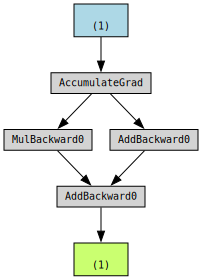

In [21]:
from torchviz import make_dot
x = torch.tensor([1.], requires_grad=True)
# make_dot((x ** 2 + 1) ** 2)

y = 2 * x
z = 3 + x
r = y + z
make_dot(r)

In [22]:
r.backward()
print(x.grad)

tensor([3.])
